# Example normalizing and analyzing continuous probability

## Initialize python

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize,fsolve
from scipy.misc import derivative

## Define probability function

In [24]:
def phif(T):
    return np.exp(-(T-20.)**2/50.)

## Plot out function

Text(0, 0.5, 'Relative probability (1/C)')

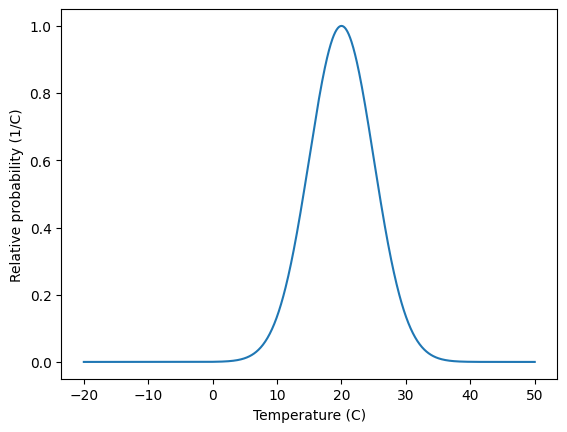

In [25]:
T = np.linspace(-20,50,1000)
phi = phif(T)
plt.plot(T,phi)
plt.xlabel('Temperature (C)')
plt.ylabel('Relative probability (1/C)')

### Bell shaped curve!

## Normalize by numerical integration

12.533141360789944


Text(0, 0.5, 'Relative probability (1/C)')

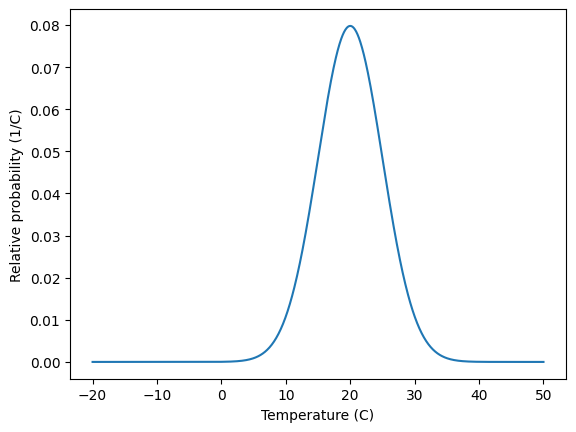

In [26]:
N,err = quad(phif,-20,50)
print(N)

def phif_norm(T):
    return phif(T)/N

plt.plot(T,phif_norm(T))
plt.xlabel('Temperature (C)')
plt.ylabel('Relative probability (1/C)')


## Most probable value of $T$

### Find derivative of probability

<ipython-input-29-56ae60cd026a>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(phif_norm,T,dx=1e-6)


Text(0, 0.5, 'Derivative of probability (1/C**2)')

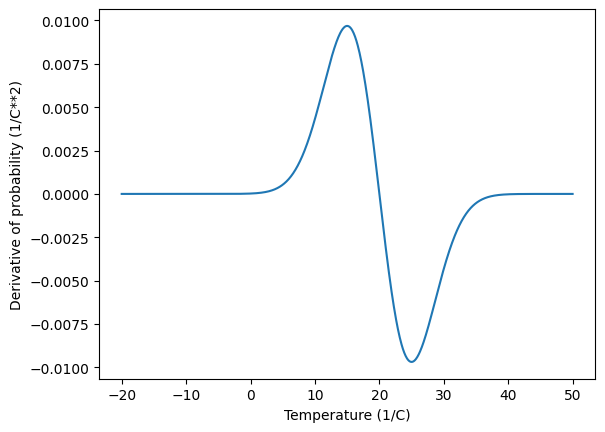

In [29]:
def phi_prime(T):
  return derivative(phif_norm,T,dx=1e-6)

plt.plot(T,phi_prime(T))
plt.xlabel('Temperature (1/C)')
plt.ylabel('Derivative of probability (1/C**2)')


### Solve for zero of derivative

In [35]:
Tguess = 18.
root=fsolve(phi_prime,Tguess)
print(f"Most probably T = {root} C")

Most probably T = [20.] C


<ipython-input-29-56ae60cd026a>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(phif_norm,T,dx=1e-6)


### Other strategies are to seek a numerical maximum of phi or to define a symbolic version of phi and seek a maximum of that.

## Expectation value of $T$:

In [ ]:
def Tphif(T):
    return T*phif_norm(T)
Tbar,err = quad(Tphif,-20,50)
print("Expectation value of T = {:4.1f} deg C".format(Tbar))

plt.plot(T,phif_norm(T))
plt.xlabel('Temperature (C)')
plt.ylabel('Relative probability (1/C)')
plt.plot([Tbar,Tbar],[0,0.09],ls='-')

## Variance and standard deviation

In [ ]:
def T2phif(T):
    return T*T*phif_norm(T)
T2bar,err = quad(T2phif,-20,50)
print("Expectation value of T**2 = {:4.1f} deg C**2".format(T2bar))

Trms=np.sqrt(T2bar)
print("Room mean square T ={:4.1f} deg C".format(Trms))

variance = T2bar-Tbar*Tbar
print("Variance ={:4.1f} deg C**2".format(variance))

stddev = np.sqrt(variance)
print("Standard deviation ={:4.1f} deg C".format(stddev))


## Probability for $T$ to be within +/- 1 $\sigma$

In [ ]:
prob,err = quad(phif_norm,Tbar-stddev,Tbar+stddev)
print("Probability = {:4.3f}".format(prob))

Unitless!!!